# Natural Language Processing
## Assigment 01: Urdu to Roman Urdu using LSTM and BiLSTM
## Muhammad Abu Huraira 22F-3853
## Shayan Zawar 22F-3410

# Data Preprocessing
Following techniques were used for data preprocessing:
* Data Merging
* Special character removal
* Removal of incomplete poems

Data preprocessing is mostly occured using python script 

In [1]:
# combine all poems to one single txt files
# import os
# import glob

# def combine_ghazals_by_language(dataset_path, language, output_filename):
#     """
#     Combine all ghazals of a specific language from all poets into one text file.
    
#     Args:
#         dataset_path (str): Path to the dataset directory
#         language (str): Language code ('ur' for Urdu, 'en' for English, 'hi' for Hindi)
#         output_filename (str): Name of the output file
#     """
    
#     # Get all poet directories
#     poets_dir = os.path.join(dataset_path, 'dataset', 'dataset')
    
#     if not os.path.exists(poets_dir):
#         print(f"Error: Dataset directory not found at {poets_dir}")
#         return
    
#     # Get all poet directories
#     poet_dirs = [d for d in os.listdir(poets_dir) if os.path.isdir(os.path.join(poets_dir, d)) and not d.startswith('.')]
    
#     print(f"Found {len(poet_dirs)} poets in the dataset")
    
#     combined_content = []
#     file_count = 0
    
#     for poet in sorted(poet_dirs):
#         poet_path = os.path.join(poets_dir, poet)
#         language_path = os.path.join(poet_path, language)
        
#         if os.path.exists(language_path):
            
            
#             # Get all ghazal files for this poet in the specified language
#             ghazal_files = [f for f in os.listdir(language_path) if os.path.isfile(os.path.join(language_path, f))]
            
#             for ghazal_file in sorted(ghazal_files):
#                 file_path = os.path.join(language_path, ghazal_file)
                
#                 try:
#                     with open(file_path, 'r', encoding='utf-8') as f:
#                         content = f.read().strip()
                        
#                         if content:  # Only add non-empty files
#                             # Add poet and ghazal information as header
                            
#                             combined_content.append(" ")
#                             combined_content.append(content)

#                             file_count += 1
                            
#                 except Exception as e:
#                     print(f"Error reading file {file_path}: {e}")
#         else:
#             print(f"No {language} directory found for {poet}")
    
#     # Write combined content to output file
#     try:
#         with open(output_filename, 'w', encoding='utf-8') as f:
#             f.write("\n".join(combined_content))
        
#         print(f"\nSuccessfully combined {file_count} {language} ghazals into '{output_filename}'")
#         print(f"Total poets with {language} content: {len([p for p in poet_dirs if os.path.exists(os.path.join(poets_dir, p, language))])}")
        
#     except Exception as e:
#         print(f"Error writing output file: {e}")

# # Set the dataset path
# dataset_path = "dataset"

# print("Starting ghazal combination process...\n")

# # Combine Urdu ghazals
# print("Combining Urdu ghazals...")
# combine_ghazals_by_language(dataset_path, 'ur', 'all_urdu_ghazals.txt')

# print("\n" + "="*60 + "\n")

# # Combine English ghazals  
# print("Combining English ghazals...")
# combine_ghazals_by_language(dataset_path, 'en', 'all_english_ghazals.txt')

# print("\n" + "="*60 + "\n")
# print("All done! Check the generated files:")
# print("  all_urdu_ghazals.txt")
# print("   all_english_ghazals.txt")

In [2]:
# # Clean/simplify transliteration: remove diacritics, dots in words, and merge hyphenated tokens
# import re
# import unicodedata
# from pathlib import Path

# # Map special punctuation to simpler forms (hyphen-like to '-') and drop ayn-like marks
# TRANSLATION_TABLE = str.maketrans({
#     "—": "-",
#     "–": "-",
#     "‑": "-",  # non-breaking hyphen
#     "‒": "-",
#     "−": "-",
#     "’": "",
#     "‘": "",
#     "ʼ": "",
#     "‛": "",
#     "ʿ": "",   # ayn mark often used in translits
# })

# def strip_diacritics(text: str) -> str:
#     # Normalize to NFKD and remove combining diacritics (e.g., ā -> a, ī -> i, ḳ -> k, ñ -> n)
#     decomposed = unicodedata.normalize("NFKD", text)
#     return "".join(ch for ch in decomposed if not unicodedata.combining(ch))

# def simplify_transliteration_line(line: str) -> str:
#     # 1) unify special punctuation, remove ayn/apostrophes
#     s = line.translate(TRANSLATION_TABLE)
#     # 2) remove diacritics
#     s = strip_diacritics(s)
#     # 3) remove periods inside words like "ga.e" -> "gae"
#     s = re.sub(r"(?<=\w)\.(?=\w)", "", s)
#     # 4) merge hyphenated tokens between letters: "tishna-labi" -> "tishnalabi", "shab-o-roz" -> "shaboroz"
#     s = re.sub(r"(?i)(?<=\w)-(?!\s)(?=\w)", "", s)
#     # 5) collapse multiple spaces; keep line breaks as-is by working per-line
#     s = re.sub(r"\s+", " ", s).strip()
#     return s


# def simplify_file(in_path: str, out_path: str) -> None:
#     total_lines = 0
#     changed_lines = 0
#     with open(in_path, "r", encoding="utf-8") as fin, open(out_path, "w", encoding="utf-8") as fout:
#         for line in fin:
#             total_lines += 1
#             cleaned = simplify_transliteration_line(line.rstrip("\n"))
#             if cleaned != line.rstrip("\n"):
#                 changed_lines += 1
#             fout.write(cleaned + "\n")
#     print(f"Simplified '{in_path}' -> '{out_path}' | lines: {total_lines:,}, changed: {changed_lines:,}")

# # Run on the combined English transliteration file
# src = "all_english_ghazals.txt"
# dst = "all_english_ghazals_clean.txt"
# if Path(src).exists():
#     simplify_file(src, dst)
# else:
#     print(f"Source not found: {src}")

In [ ]:
# # compare_poems.py

# def read_poems(file_path):
#     """Reads a file and splits it into poems (separated by blank lines)."""
#     poems = []
#     current_poem = []
#     with open(file_path, "r", encoding="utf-8") as f:
#         for line in f:
#             if line.strip() == "":
#                 if current_poem:  # poem ended
#                     poems.append(current_poem)
#                     current_poem = []
#             else:
#                 current_poem.append(line.strip())
#         if current_poem:  # add last poem if not empty
#             poems.append(current_poem)
#     return poems


# # Files
# urdu_file = "all_urdu.txt"
# roman_file = "all_english_clean.txt"

# urdu_poems = read_poems(urdu_file)
# roman_poems = read_poems(roman_file)

# print(f"Total Urdu poems: {len(urdu_poems)}")
# print(f"Total Roman poems: {len(roman_poems)}")

# # Compare poem by poem
# min_len = min(len(urdu_poems), len(roman_poems))

# for i in range(min_len):
#     urdu_lines = urdu_poems[i]
#     roman_lines = roman_poems[i]
#     if len(urdu_lines) != len(roman_lines):
#         print(f"\n❌ Poem {i+1} mismatch:")
#         print(f"Urdu ({len(urdu_lines)} lines):")
#         print("\n".join(urdu_lines))
#         print(f"Roman Urdu ({len(roman_lines)} lines):")
#         print("\n".join(roman_lines))

# # If one file has more poems
# if len(urdu_poems) != len(roman_poems):
#     print(f"\n⚠️ Extra poems detected: Urdu={len(urdu_poems)}, Roman={len(roman_poems)}")


# Model Creation and Training

In [3]:
!pip install sentencepiece editdistance nltk editdistance gensim --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 39.4 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [6]:
# CHUNK 0 - THREE ARCHITECTURE CONFIGURATIONS
import os, random, time, math
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import sentencepiece as spm
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
nltk.download('punkt', quiet=True)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("DEVICE ->", DEVICE) 

# THREE DIFFERENT ARCHITECTURES FOR EXPERIMENTATION
ARCHITECTURES = {
    "ARCH_1": {
        "name": "Architecture 1 - Base Configuration",
        "roman_txt": "/kaggle/input/urduromanurdu-cleaned/all_english_clean.txt",
        "urdu_txt": "/kaggle/input/urduromanurdu-cleaned/all_urdu.txt",
        "roman_spm": "/kaggle/working/roman_tokenizer.model",
        "urdu_spm": "/kaggle/working/urdu_tokenizer.model",
        
        # Model Architecture
        "embed_dim": 128,           # First embedding dimension
        "hidden_size": 256,         # First hidden size
        "encoder_layers": 2,        # BiLSTM encoder layers
        "decoder_layers": 4,        # LSTM decoder layers
        
        # Training parameters
        "batch_size": 32,
        "learning_rate": 1e-3,
        "dropout": 0.1,
        "num_epochs": 20,
        "patience": 5,
        
        # Data preprocessing
        "max_len": 100,
        "min_len": 5,
        "vocab_size_src": 2500,
        "vocab_size_tgt": 2500,
        
        # Training dynamics
        "teacher_start": 0.9,
        "teacher_end": 0.3,
        "teacher_decay": 0.95,
        "warmup_steps": 1000,
        "max_grad_norm": 1.0,
        "label_smoothing": 0.1,
        "weight_decay": 1e-4,
        "num_workers": 2,
        "seed": 42,
    },
    
    "ARCH_2": {
        "name": "Architecture 2 - Enhanced Configuration",
        "roman_txt": "/kaggle/input/urduromanurdu-cleaned/all_english_clean.txt",
        "urdu_txt": "/kaggle/input/urduromanurdu-cleaned/all_urdu.txt",
        "roman_spm": "/kaggle/working/roman_tokenizer.model",
        "urdu_spm": "/kaggle/working/urdu_tokenizer.model",
        
        # Model Architecture - Different parameters
        "embed_dim": 256,           # Second embedding dimension
        "hidden_size": 512,         # Second hidden size
        "encoder_layers": 3,        # More BiLSTM encoder layers
        "decoder_layers": 3,        # Different decoder layers
        
        # Training parameters
        "batch_size": 64,           # Different batch size
        "learning_rate": 5e-4,      # Different learning rate
        "dropout": 0.3,             # Different dropout
        "num_epochs": 20,
        "patience": 5,
        
        # Data preprocessing
        "max_len": 100,
        "min_len": 5,
        "vocab_size_src": 2500,
        "vocab_size_tgt": 2500,
        
        # Training dynamics
        "teacher_start": 0.9,
        "teacher_end": 0.3,
        "teacher_decay": 0.95,
        "warmup_steps": 1000,
        "max_grad_norm": 1.0,
        "label_smoothing": 0.1,
        "weight_decay": 1e-4,
        "num_workers": 2,
        "seed": 42,
    },
    
    "ARCH_3": {
        "name": "Architecture 3 - Advanced Configuration",
        "roman_txt": "/kaggle/input/urduromanurdu-cleaned/all_english_clean.txt",
        "urdu_txt": "/kaggle/input/urduromanurdu-cleaned/all_urdu.txt",
          "roman_spm": "/kaggle/working/roman_tokenizer.model",
        "urdu_spm": "/kaggle/working/urdu_tokenizer.model",
        
        # Model Architecture - Third set of parameters
        "embed_dim": 512,           # Third embedding dimension
        "hidden_size": 512,         # Same hidden size as arch2
        "encoder_layers": 1,        # Fewer encoder layers
        "decoder_layers": 2,        # Fewer decoder layers
        
        # Training parameters
        "batch_size": 128,          # Largest batch size
        "learning_rate": 1e-4,      # Lowest learning rate
        "dropout": 0.5,             # Highest dropout
        "num_epochs": 20,
        "patience": 5,
        
        # Data preprocessing
        "max_len": 100,
        "min_len": 5,
        "vocab_size_src": 2500,
        "vocab_size_tgt": 2500,
        
        # Training dynamics
        "teacher_start": 0.9,
        "teacher_end": 0.3,
        "teacher_decay": 0.95,
        "warmup_steps": 1000,
        "max_grad_norm": 1.0,
        "label_smoothing": 0.1,
        "weight_decay": 1e-4,
        "num_workers": 2,
        "seed": 42,
    }
}

# Set seed for reproducibility
import random, torch
random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print("Three architectures configured!")
print(f"Architecture 1: Embed={ARCHITECTURES['ARCH_1']['embed_dim']}, Hidden={ARCHITECTURES['ARCH_1']['hidden_size']}, Enc={ARCHITECTURES['ARCH_1']['encoder_layers']}, Dec={ARCHITECTURES['ARCH_1']['decoder_layers']}")
print(f"Architecture 2: Embed={ARCHITECTURES['ARCH_2']['embed_dim']}, Hidden={ARCHITECTURES['ARCH_2']['hidden_size']}, Enc={ARCHITECTURES['ARCH_2']['encoder_layers']}, Dec={ARCHITECTURES['ARCH_2']['decoder_layers']}")
print(f"Architecture 3: Embed={ARCHITECTURES['ARCH_3']['embed_dim']}, Hidden={ARCHITECTURES['ARCH_3']['hidden_size']}, Enc={ARCHITECTURES['ARCH_3']['encoder_layers']}, Dec={ARCHITECTURES['ARCH_3']['decoder_layers']}")

print("Run completed")

DEVICE -> cuda
Three architectures configured!
Architecture 1: Embed=128, Hidden=256, Enc=2, Dec=4
Architecture 2: Embed=256, Hidden=512, Enc=3, Dec=3
Architecture 3: Embed=512, Hidden=512, Enc=1, Dec=2
Run completed


In [14]:
# Chunk 1: LOADING PRE-TRAINED TOKENIZERS FROM KAGGLE
import sentencepiece as spm
import os

# Since we're using pre-trained tokenizers from Kaggle, we just need to verify they exist
print("Using pre-trained tokenizers from Kaggle datasets...")

# Check if tokenizer files exist for all architectures
for arch_name, config in ARCHITECTURES.items():
    print(f"\nChecking tokenizers for {arch_name} ===")
    
    urdu_tokenizer_path = config["urdu_spm"]
    roman_tokenizer_path = config["roman_spm"]
    
    if os.path.exists(urdu_tokenizer_path):
        print(f"Urdu tokenizer found: {urdu_tokenizer_path}")
    else:
        print(f"Urdu tokenizer not found: {urdu_tokenizer_path}")
    
    if os.path.exists(roman_tokenizer_path):
        print(f"Roman tokenizer found: {roman_tokenizer_path}")
    else:
        print(f"Roman tokenizer not found: {roman_tokenizer_path}")

print("\nTokenizer check completed! All architectures will use the same pre-trained tokenizers.")

Using pre-trained tokenizers from Kaggle datasets...

Checking tokenizers for ARCH_1 ===
Urdu tokenizer found: /kaggle/working/urdu_tokenizer.model
Roman tokenizer found: /kaggle/working/roman_tokenizer.model

Checking tokenizers for ARCH_2 ===
Urdu tokenizer found: /kaggle/working/urdu_tokenizer.model
Roman tokenizer found: /kaggle/working/roman_tokenizer.model

Checking tokenizers for ARCH_3 ===
Urdu tokenizer found: /kaggle/working/urdu_tokenizer.model
Roman tokenizer found: /kaggle/working/roman_tokenizer.model

Tokenizer check completed! All architectures will use the same pre-trained tokenizers.


In [15]:
# Chunk 2: DATA LOADING WITH 50-25-25 SPLIT FOR ALL ARCHITECTURES
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import sentencepiece as spm

def load_and_prepare_data(config, arch_name):
    """Load and prepare data for a specific architecture with 50-25-25 split"""
    print(f"\n=== Preparing data for {arch_name} ===")
    
    # Load tokenizers
    urdu_sp = spm.SentencePieceProcessor()
    urdu_sp.load(config["urdu_spm"])
    roman_sp = spm.SentencePieceProcessor()
    roman_sp.load(config["roman_spm"])

    # Define token IDs
    SRC_PAD = urdu_sp.pad_id()
    TGT_PAD = roman_sp.pad_id()
    BOS_ID = roman_sp.bos_id()
    EOS_ID = roman_sp.eos_id()

    print(f"Vocab sizes: Urdu={urdu_sp.get_piece_size()}, Roman={roman_sp.get_piece_size()}")

    # Read data
    with open(config["urdu_txt"], "r", encoding="utf-8") as f:
        urdu_lines = [line.strip() for line in f if line.strip()]

    with open(config["roman_txt"], "r", encoding="utf-8") as f:  
        roman_lines = [line.strip() for line in f if line.strip()]

    print(f"Raw lines: Urdu={len(urdu_lines)}, Roman={len(roman_lines)}")
    assert len(urdu_lines) == len(roman_lines), "Misaligned data!"

    # Filter pairs
    def is_valid_pair(urdu_text, roman_text):
        if len(urdu_text.split()) > config["max_len"] or len(roman_text.split()) > config["max_len"]:
            return False
        if len(urdu_text.split()) < config["min_len"] or len(roman_text.split()) < config["min_len"]:
            return False
        
        urdu_ids = urdu_sp.encode(urdu_text, out_type=int)
        roman_ids = roman_sp.encode(roman_text, out_type=int)
        
        if len(urdu_ids) == 0 or len(roman_ids) == 0:
            return False
        if len(urdu_ids) > config["max_len"] or len(roman_ids) > config["max_len"]:
            return False
        
        return True

    # Create valid pairs
    valid_pairs = []
    for urdu, roman in zip(urdu_lines, roman_lines):
        if is_valid_pair(urdu, roman):
            valid_pairs.append((urdu, roman))

    print(f"Valid pairs after filtering: {len(valid_pairs)}")

    # 50-25-25 Split with shuffling
    import random
    random.shuffle(valid_pairs)

    n = len(valid_pairs)
    train_end = int(0.5 * n)    # 50% train
    valid_end = int(0.75 * n)   # 25% valid, 25% test

    train_pairs = valid_pairs[:train_end]
    valid_pairs_split = valid_pairs[train_end:valid_end]  
    test_pairs = valid_pairs[valid_end:]

    print(f"Data splits: train={len(train_pairs)} (50%), valid={len(valid_pairs_split)} (25%), test={len(test_pairs)} (25%)")
    
    return {
        'train_pairs': train_pairs,
        'valid_pairs': valid_pairs_split,
        'test_pairs': test_pairs,
        'urdu_sp': urdu_sp,
        'roman_sp': roman_sp,
        'SRC_PAD': SRC_PAD,
        'TGT_PAD': TGT_PAD,
        'BOS_ID': BOS_ID,
        'EOS_ID': EOS_ID
    }

class ImprovedDataset(Dataset):
    def __init__(self, pairs, src_sp, tgt_sp, max_len, bos_id, eos_id):
        self.pairs = pairs
        self.src_sp = src_sp
        self.tgt_sp = tgt_sp 
        self.max_len = max_len
        self.bos_id = bos_id
        self.eos_id = eos_id
        
    def __len__(self):
        return len(self.pairs)
        
    def __getitem__(self, idx):
        src_text, tgt_text = self.pairs[idx]
        
        # Tokenize
        src_ids = self.src_sp.encode(src_text, out_type=int)
        tgt_ids = self.tgt_sp.encode(tgt_text, out_type=int)
        
        # Truncate if needed
        src_ids = src_ids[:self.max_len-2]
        tgt_ids = tgt_ids[:self.max_len-2]
        
        # Add special tokens for target
        tgt_input = [self.bos_id] + tgt_ids
        tgt_output = tgt_ids + [self.eos_id] 
        
        return {
            'src': torch.tensor(src_ids, dtype=torch.long),
            'tgt_input': torch.tensor(tgt_input, dtype=torch.long),
            'tgt_output': torch.tensor(tgt_output, dtype=torch.long),
            'src_len': len(src_ids),
            'tgt_len': len(tgt_ids) + 1
        }

def create_collate_fn(src_pad, tgt_pad):
    """Create collate function with specific padding tokens"""
    def collate_fn(batch):
        if len(batch) == 0:
            return None
            
        srcs = [item['src'] for item in batch]
        tgt_inputs = [item['tgt_input'] for item in batch] 
        tgt_outputs = [item['tgt_output'] for item in batch]
        src_lens = torch.tensor([item['src_len'] for item in batch], dtype=torch.long)
        
        src_padded = pad_sequence(srcs, batch_first=True, padding_value=src_pad)
        tgt_input_padded = pad_sequence(tgt_inputs, batch_first=True, padding_value=tgt_pad)
        tgt_output_padded = pad_sequence(tgt_outputs, batch_first=True, padding_value=tgt_pad)
        
        return {
            'src': src_padded,
            'tgt_input': tgt_input_padded, 
            'tgt_output': tgt_output_padded,
            'src_lens': src_lens
        }
    return collate_fn

def create_data_loaders(data_dict, config):
    """Create data loaders for a specific architecture"""
    
    # Create datasets
    train_dataset = ImprovedDataset(
        data_dict['train_pairs'], data_dict['urdu_sp'], data_dict['roman_sp'], 
        config["max_len"], data_dict['BOS_ID'], data_dict['EOS_ID']
    )
    valid_dataset = ImprovedDataset(
        data_dict['valid_pairs'], data_dict['urdu_sp'], data_dict['roman_sp'], 
        config["max_len"], data_dict['BOS_ID'], data_dict['EOS_ID']
    )
    test_dataset = ImprovedDataset(
        data_dict['test_pairs'], data_dict['urdu_sp'], data_dict['roman_sp'], 
        config["max_len"], data_dict['BOS_ID'], data_dict['EOS_ID']
    )

    # Create collate function
    collate_fn = create_collate_fn(data_dict['SRC_PAD'], data_dict['TGT_PAD'])

    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config["batch_size"],
        shuffle=True,
        collate_fn=collate_fn,
        pin_memory=True,
        num_workers=config["num_workers"]
    )

    valid_loader = DataLoader(
        valid_dataset,
        batch_size=config["batch_size"], 
        shuffle=False,
        collate_fn=collate_fn,
        pin_memory=True,
        num_workers=config["num_workers"]
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=1,
        shuffle=False, 
        collate_fn=collate_fn
    )
    
    return train_loader, valid_loader, test_loader

# Prepare data for all architectures
ALL_DATA = {}
for arch_name, config in ARCHITECTURES.items():
    ALL_DATA[arch_name] = load_and_prepare_data(config, arch_name)

print("\nData preparation completed for all architectures!")
print("Data splits are 50% train, 25% validation, 25% test as requested.")


=== Preparing data for ARCH_1 ===
Vocab sizes: Urdu=2500, Roman=2500
Raw lines: Urdu=21000, Roman=21000
Valid pairs after filtering: 19515
Data splits: train=9757 (50%), valid=4879 (25%), test=4879 (25%)

=== Preparing data for ARCH_2 ===
Vocab sizes: Urdu=2500, Roman=2500
Raw lines: Urdu=21000, Roman=21000
Valid pairs after filtering: 19515
Data splits: train=9757 (50%), valid=4879 (25%), test=4879 (25%)

=== Preparing data for ARCH_3 ===
Vocab sizes: Urdu=2500, Roman=2500
Raw lines: Urdu=21000, Roman=21000
Valid pairs after filtering: 19515
Data splits: train=9757 (50%), valid=4879 (25%), test=4879 (25%)

Data preparation completed for all architectures!
Data splits are 50% train, 25% validation, 25% test as requested.


In [16]:
# Chunk 3: MODEL ARCHITECTURES FOR ALL THREE CONFIGURATIONS
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import math

class ImprovedEncoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, n_layers, dropout, src_pad):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=src_pad)
        self.rnn = nn.LSTM(
            embed_dim, hidden_dim, n_layers, 
            batch_first=True, bidirectional=True, 
            dropout=dropout if n_layers > 1 else 0.0
        )
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_lengths):
        embedded = self.dropout(self.embedding(src))
        
        packed = pack_padded_sequence(
            embedded, src_lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        
        packed_outputs, (hidden, cell) = self.rnn(packed)
        outputs, _ = pad_packed_sequence(packed_outputs, batch_first=True)
        
        return outputs, (hidden, cell)

class ImprovedDecoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, n_layers, dropout, tgt_pad):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=tgt_pad)
        
        self.rnn = nn.LSTM(
            embed_dim, hidden_dim, n_layers,
            batch_first=True,
            dropout=dropout if n_layers > 1 else 0.0
        )
        
        self.output_projection = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input_token, hidden, cell):
        embedded = self.dropout(self.embedding(input_token))
        rnn_output, (new_hidden, new_cell) = self.rnn(embedded, (hidden, cell))
        output = self.output_projection(rnn_output.squeeze(1))
        return output, (new_hidden, new_cell)

class ImprovedSeq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder  
        self.device = device
        
        # Fixed projection layers to handle bidirectional encoder properly
        encoder_hidden_size = encoder.rnn.hidden_size * 2  # bidirectional
        decoder_hidden_size = decoder.rnn.hidden_size
        decoder_num_layers = decoder.rnn.num_layers
        
        # Project from bidirectional encoder to decoder dimensions
        self.hidden_projection = nn.Linear(encoder_hidden_size, decoder_hidden_size)
        self.cell_projection = nn.Linear(encoder_hidden_size, decoder_hidden_size)
        
    def init_decoder_states(self, encoder_hidden, encoder_cell):
        """Initialize decoder states from encoder final states - FIXED VERSION"""
        # encoder_hidden shape: (encoder_layers * 2, batch, encoder_hidden_size)
        # encoder_cell shape: (encoder_layers * 2, batch, encoder_hidden_size) 
        # We need: (decoder_layers, batch, decoder_hidden_size)
        
        batch_size = encoder_hidden.size(1)
        encoder_layers = encoder_hidden.size(0) // 2  # divide by 2 for bidirectional
        decoder_layers = self.decoder.rnn.num_layers
        
        # Take the final forward and backward hidden states
        # Forward: encoder_hidden[encoder_layers-1] 
        # Backward: encoder_hidden[encoder_layers*2-1]
        final_forward_h = encoder_hidden[encoder_layers - 1]  # Last forward layer
        final_backward_h = encoder_hidden[-1]  # Last backward layer (encoder_layers*2 - 1)
        
        final_forward_c = encoder_cell[encoder_layers - 1] 
        final_backward_c = encoder_cell[-1]
        
        # Concatenate forward and backward
        final_h = torch.cat([final_forward_h, final_backward_h], dim=1)
        final_c = torch.cat([final_forward_c, final_backward_c], dim=1)
        
        # Project to decoder dimensions
        projected_h = self.hidden_projection(final_h)  # (batch, decoder_hidden_size)
        projected_c = self.cell_projection(final_c)    # (batch, decoder_hidden_size)
        
        # Repeat for all decoder layers
        decoder_hidden = projected_h.unsqueeze(0).repeat(decoder_layers, 1, 1)
        decoder_cell = projected_c.unsqueeze(0).repeat(decoder_layers, 1, 1)
        
        return decoder_hidden, decoder_cell
        
    def forward(self, src, src_lengths, tgt_input, teacher_forcing_ratio=0.5):
        batch_size = src.size(0)
        tgt_len = tgt_input.size(1)
        vocab_size = self.decoder.output_projection.out_features
        
        encoder_outputs, (encoder_hidden, encoder_cell) = self.encoder(src, src_lengths)
        decoder_hidden, decoder_cell = self.init_decoder_states(encoder_hidden, encoder_cell)
        
        outputs = torch.zeros(batch_size, tgt_len, vocab_size).to(self.device)
        input_token = tgt_input[:, 0:1]
        
        for t in range(1, tgt_len):
            output, (decoder_hidden, decoder_cell) = self.decoder(
                input_token, decoder_hidden, decoder_cell
            )
            
            outputs[:, t] = output
            
            if random.random() < teacher_forcing_ratio:
                input_token = tgt_input[:, t:t+1]
            else:
                input_token = output.argmax(dim=-1, keepdim=True)
                
        return outputs

def create_model_for_architecture(config, data_dict, arch_name):
    """Create model for a specific architecture"""
    print(f"\n=== Creating model for {arch_name} ===")
    
    encoder = ImprovedEncoder(
        vocab_size=data_dict['urdu_sp'].get_piece_size(),
        embed_dim=config["embed_dim"],
        hidden_dim=config["hidden_size"], 
        n_layers=config["encoder_layers"],
        dropout=config["dropout"],
        src_pad=data_dict['SRC_PAD']
    )

    decoder = ImprovedDecoder(
        vocab_size=data_dict['roman_sp'].get_piece_size(),
        embed_dim=config["embed_dim"],
        hidden_dim=config["hidden_size"],
        n_layers=config["decoder_layers"],
        dropout=config["dropout"],
        tgt_pad=data_dict['TGT_PAD']
    )

    model = ImprovedSeq2Seq(encoder, decoder, DEVICE).to(DEVICE)
    
    def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    param_count = count_parameters(model)
    print(f"{arch_name} has {param_count:,} trainable parameters")
    print(f"Config: Embed={config['embed_dim']}, Hidden={config['hidden_size']}, Enc_layers={config['encoder_layers']}, Dec_layers={config['decoder_layers']}")
    
    return model

# Create models for all architectures
ALL_MODELS = {}
for arch_name, config in ARCHITECTURES.items():
    ALL_MODELS[arch_name] = create_model_for_architecture(config, ALL_DATA[arch_name], arch_name)

print(f"\nAll three models created successfully!")
print("Architecture comparison:")
for arch_name in ARCHITECTURES.keys():
    config = ARCHITECTURES[arch_name]
    print(f"{arch_name}: {config['embed_dim']}-{config['hidden_size']}-{config['encoder_layers']}-{config['decoder_layers']} | Batch: {config['batch_size']} | LR: {config['learning_rate']} | Dropout: {config['dropout']}")

import random


=== Creating model for ARCH_1 ===
ARCH_1 has 5,886,916 trainable parameters
Config: Embed=128, Hidden=256, Enc_layers=2, Dec_layers=4

=== Creating model for ARCH_2 ===
ARCH_2 has 25,144,772 trainable parameters
Config: Embed=256, Hidden=512, Enc_layers=3, Dec_layers=3

=== Creating model for ARCH_3 ===
ARCH_3 has 13,297,092 trainable parameters
Config: Embed=512, Hidden=512, Enc_layers=1, Dec_layers=2

All three models created successfully!
Architecture comparison:
ARCH_1: 128-256-2-4 | Batch: 32 | LR: 0.001 | Dropout: 0.1
ARCH_2: 256-512-3-3 | Batch: 64 | LR: 0.0005 | Dropout: 0.3
ARCH_3: 512-512-1-2 | Batch: 128 | LR: 0.0001 | Dropout: 0.5


# Training of all 3 Architectures
all architectures used 50 % train 25% validation and  25% testing split. 

In [17]:
# Chunk 4: TRAINING FUNCTION FOR ALL THREE ARCHITECTURES
import torch.optim as optim
import math
import time
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def train_architecture(arch_name, model, config, data_dict, best_model_from_previous=None):
    """Train a single architecture"""
    print(f"\n{'='*80}")
    print(f"TRAINING {arch_name.upper()}")
    print(f"{'='*80}")
    
    # Load best model from previous architecture if available
    if best_model_from_previous is not None:
        print(f"Loading best model from previous architecture...")
        # Only load compatible parameters
        try:
            model.load_state_dict(best_model_from_previous, strict=False)
            print("Successfully loaded compatible parameters from previous best model")
        except Exception as e:
            print(f"Could not load previous model, starting fresh: {e}")
    
    # Create data loaders
    train_loader, valid_loader, test_loader = create_data_loaders(data_dict, config)
    
    # Optimizer and scheduler
    optimizer = optim.AdamW(
        model.parameters(), 
        lr=config["learning_rate"],
        weight_decay=config["weight_decay"],
        betas=(0.9, 0.98),
        eps=1e-9
    )

    def get_lr_scheduler(optimizer, warmup_steps, total_steps):
        def lr_lambda(step):
            if step < warmup_steps:
                return step / warmup_steps
            else:
                return math.sqrt(warmup_steps / step)
        return optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    total_steps = len(train_loader) * config["num_epochs"]
    scheduler = get_lr_scheduler(optimizer, config["warmup_steps"], total_steps)
    criterion = nn.CrossEntropyLoss(ignore_index=data_dict['TGT_PAD'], label_smoothing=config["label_smoothing"])

    # Early stopping
    class EarlyStopping:
        def __init__(self, patience=5, min_delta=0.001):
            self.patience = patience
            self.min_delta = min_delta
            self.counter = 0
            self.best_loss = float('inf')
            
        def __call__(self, val_loss):
            if val_loss < self.best_loss - self.min_delta:
                self.best_loss = val_loss
                self.counter = 0
                return False
            else:
                self.counter += 1
                return self.counter >= self.patience

    early_stopping = EarlyStopping(patience=config["patience"])

    def evaluate_model(model, dataloader, criterion, device):
        model.eval()
        total_loss = 0.0
        total_samples = 0
        
        with torch.no_grad():
            for batch in dataloader:
                if batch is None:
                    continue
                    
                src = batch['src'].to(device)
                src_lens = batch['src_lens'].to(device)
                tgt_input = batch['tgt_input'].to(device)
                tgt_output = batch['tgt_output'].to(device)
                
                outputs = model(src, src_lens, tgt_input, teacher_forcing_ratio=0.0)
                loss = criterion(
                    outputs[:, 1:, :].reshape(-1, outputs.size(-1)),
                    tgt_output[:, 1:].reshape(-1)
                )
                
                total_loss += loss.item() * src.size(0)
                total_samples += src.size(0)
        
        return total_loss / total_samples

    def translate_sentence(model, sentence, src_sp, tgt_sp, device, max_len=100):
        model.eval()
        
        with torch.no_grad():
            src_tokens = src_sp.encode(sentence, out_type=int)
            if len(src_tokens) == 0:
                return ""
                
            src = torch.tensor([src_tokens], dtype=torch.long).to(device)
            src_lens = torch.tensor([len(src_tokens)], dtype=torch.long).to(device)
            
            encoder_outputs, (encoder_hidden, encoder_cell) = model.encoder(src, src_lens)
            decoder_hidden, decoder_cell = model.init_decoder_states(encoder_hidden, encoder_cell)
            
            translated_tokens = [data_dict['BOS_ID']]
            input_token = torch.tensor([[data_dict['BOS_ID']]], dtype=torch.long).to(device)
            
            for _ in range(max_len):
                output, (decoder_hidden, decoder_cell) = model.decoder(
                    input_token, decoder_hidden, decoder_cell
                )
                
                next_token = output.argmax(dim=-1).item()
                translated_tokens.append(next_token)
                
                if next_token == data_dict['EOS_ID']:
                    break
                    
                input_token = torch.tensor([[next_token]], dtype=torch.long).to(device)
            
            translated_tokens = [t for t in translated_tokens[1:] if t != data_dict['EOS_ID']]
            return tgt_sp.decode(translated_tokens)

    # Training loop
    print(f"Starting training for {arch_name}")
    smooth = SmoothingFunction().method1

    best_val_loss = float('inf')
    best_model_state = None
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_bleu': [],
        'learning_rates': []
    }

    for epoch in range(1, config["num_epochs"] + 1):
        start_time = time.time()
        
        # Teacher forcing ratio decay
        tf_ratio = config["teacher_end"] + \
                   (config["teacher_start"] - config["teacher_end"]) * \
                   (config["teacher_decay"] ** epoch)
        
        # Training phase
        model.train()
        train_loss = 0.0
        num_batches = 0
        
        for batch in train_loader:
            if batch is None:
                continue
                
            src = batch['src'].to(DEVICE, non_blocking=True)
            src_lens = batch['src_lens'].to(DEVICE, non_blocking=True)
            tgt_input = batch['tgt_input'].to(DEVICE, non_blocking=True)
            tgt_output = batch['tgt_output'].to(DEVICE, non_blocking=True)
            
            optimizer.zero_grad()
            outputs = model(src, src_lens, tgt_input, teacher_forcing_ratio=tf_ratio)
            
            loss = criterion(
                outputs[:, 1:, :].reshape(-1, outputs.size(-1)),
                tgt_output[:, 1:].reshape(-1)  
            )
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=config["max_grad_norm"])
            optimizer.step() 
            scheduler.step()
            
            train_loss += loss.item()
            num_batches += 1
            
            if num_batches % 50 == 0:
                print(f"  Epoch {epoch}, Batch {num_batches}, Loss: {loss.item():.4f}")
        
        avg_train_loss = train_loss / num_batches
        val_loss = evaluate_model(model, valid_loader, criterion, DEVICE)
        
        # Calculate BLEU score
        bleu_scores = []
        sample_pairs = random.sample(data_dict['valid_pairs'], min(30, len(data_dict['valid_pairs'])))
        
        for src_text, ref_text in sample_pairs:
            pred_text = translate_sentence(model, src_text, data_dict['urdu_sp'], data_dict['roman_sp'], DEVICE)
            if pred_text:
                bleu = sentence_bleu([ref_text.split()], pred_text.split(), smoothing_function=smooth)
                bleu_scores.append(bleu)
        
        avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0.0
        
        # Log metrics
        current_lr = scheduler.get_last_lr()[0]
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(val_loss) 
        history['val_bleu'].append(avg_bleu)
        history['learning_rates'].append(current_lr)
        
        # Print epoch summary
        epoch_time = time.time() - start_time
        print(f"Epoch {epoch}/{config['num_epochs']} - {epoch_time:.1f}s")
        print(f"  Train Loss: {avg_train_loss:.4f} | Val Loss: {val_loss:.4f} | Val BLEU: {avg_bleu:.4f}")
        print(f"  Teacher Forcing: {tf_ratio:.3f} | Learning Rate: {current_lr:.2e}")
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            print("  -> New best model!")
        
        # Early stopping
        if early_stopping(val_loss):
            print(f"Early stopping at epoch {epoch}")
            break
        
        print("-" * 60)

    # Return results
    return {
        'best_model_state': best_model_state,
        'best_val_loss': best_val_loss,
        'history': history,
        'config': config,
        'final_model': model
    }

# Train all three architectures
TRAINING_RESULTS = {}
best_model_so_far = None

for arch_name, config in ARCHITECTURES.items():
    print(f"\n\n{'#'*100}")
    print(f"STARTING TRAINING FOR {arch_name}")
    print(f"{'#'*100}")
    
    model = ALL_MODELS[arch_name]
    data_dict = ALL_DATA[arch_name]
    
    # Train this architecture
    results = train_architecture(arch_name, model, config, data_dict, best_model_so_far)
    TRAINING_RESULTS[arch_name] = results
    
    # Update best model if this one is better
    if best_model_so_far is None or results['best_val_loss'] < min([r['best_val_loss'] for r in TRAINING_RESULTS.values() if r != results]):
        best_model_so_far = results['best_model_state']
        print(f"\n{arch_name} is the new best architecture!")
    
    # Save architecture results
    torch.save({
        'arch_name': arch_name,
        'model_state_dict': results['best_model_state'],
        'val_loss': results['best_val_loss'],
        'history': results['history'],
        'config': config
    }, f'best_model_{arch_name.lower()}.pt')
    
    print(f"\nCompleted training for {arch_name}")
    print(f"Best validation loss: {results['best_val_loss']:.4f}")

print(f"\n{'='*100}")
print("ALL ARCHITECTURES TRAINING COMPLETED!")
print(f"{'='*100}")

# Print summary of all architectures
print("\nARCHITECTURE COMPARISON:")
print("-" * 80)
for arch_name, results in TRAINING_RESULTS.items():
    config = ARCHITECTURES[arch_name]
    print(f"{arch_name}:")
    print(f"  Config: Embed={config['embed_dim']}, Hidden={config['hidden_size']}, Enc={config['encoder_layers']}, Dec={config['decoder_layers']}")
    print(f"  Batch size: {config['batch_size']}, LR: {config['learning_rate']}, Dropout: {config['dropout']}")
    print(f"  Best Val Loss: {results['best_val_loss']:.4f}")
    print(f"  Final BLEU: {results['history']['val_bleu'][-1]:.4f}")
    print()

# Find best architecture
best_arch = min(TRAINING_RESULTS.items(), key=lambda x: x[1]['best_val_loss'])
print(f"BEST ARCHITECTURE: {best_arch[0]} with validation loss {best_arch[1]['best_val_loss']:.4f}")



####################################################################################################
STARTING TRAINING FOR ARCH_1
####################################################################################################

TRAINING ARCH_1
Starting training for ARCH_1
  Epoch 1, Batch 50, Loss: 7.8126
  Epoch 1, Batch 100, Loss: 6.8512
  Epoch 1, Batch 150, Loss: 6.0294
  Epoch 1, Batch 200, Loss: 5.9218
  Epoch 1, Batch 250, Loss: 5.9844
  Epoch 1, Batch 300, Loss: 5.9430
Epoch 1/20 - 20.0s
  Train Loss: 6.6165 | Val Loss: 5.9926 | Val BLEU: 0.0000
  Teacher Forcing: 0.870 | Learning Rate: 3.05e-04
  -> New best model!
------------------------------------------------------------
  Epoch 2, Batch 50, Loss: 5.9088
  Epoch 2, Batch 100, Loss: 5.8948
  Epoch 2, Batch 150, Loss: 5.8699
  Epoch 2, Batch 200, Loss: 5.8705
  Epoch 2, Batch 250, Loss: 5.8214
  Epoch 2, Batch 300, Loss: 5.7399
Epoch 2/20 - 19.4s
  Train Loss: 5.8825 | Val Loss: 5.8509 | Val BLEU: 0.0133
  Teacher Forc

# Testing Architectures


EVALUATING ALL ARCHITECTURES ON TEST SET...

EVALUATING ARCH_1 ON TEST SET

ARCH_1 SAMPLE TRANSLATIONS:
----------------------------------------
1. Urdu: زندگی تجھ پہ اب الزام کوئی کیا رکھے
   Roman: pe pe pe kya kya kya

2. Urdu: عاشقی میں میرؔ جیسے خواب مت دیکھا کرو
   Roman: i men men khvab khvabn tumhen tumhen

3. Urdu: اب کے ہم بچھڑے تو شاید کبھی خوابوں میں ملیں
   Roman: ab to ke toe to toonon men men

4. Urdu: دل میں کیا ہے محبت کے سوا اور کیا ہے
   Roman: men men hai hai kya ke ke kya kya hai

5. Urdu: یہ دنیا اک تماشا ہے جہاں ہر شخص اداکار
   Roman: ik ik ik har har har har baar-

Evaluating on 4879 test examples...
Example 1:
  SRC:  اوس پڑی تھی رات بہت اور کہرہ تھا گرمائش پر
  REF:  os padi thi raat bahut aur kohra tha garmaish par
  PRED: ki thi thi thi thi thi par para tha
  BLEU: 0.0282, CER: 0.6122

Example 2:
  SRC:  میں دیکھوں تو سہی دنیا تمہیں کیسے ستاتی ہے
  REF:  main dekhun to sahi duniya tumhen kaise satati hai
  PRED: phir to bahar saetiititi hai
  BLEU: 0.0287, 

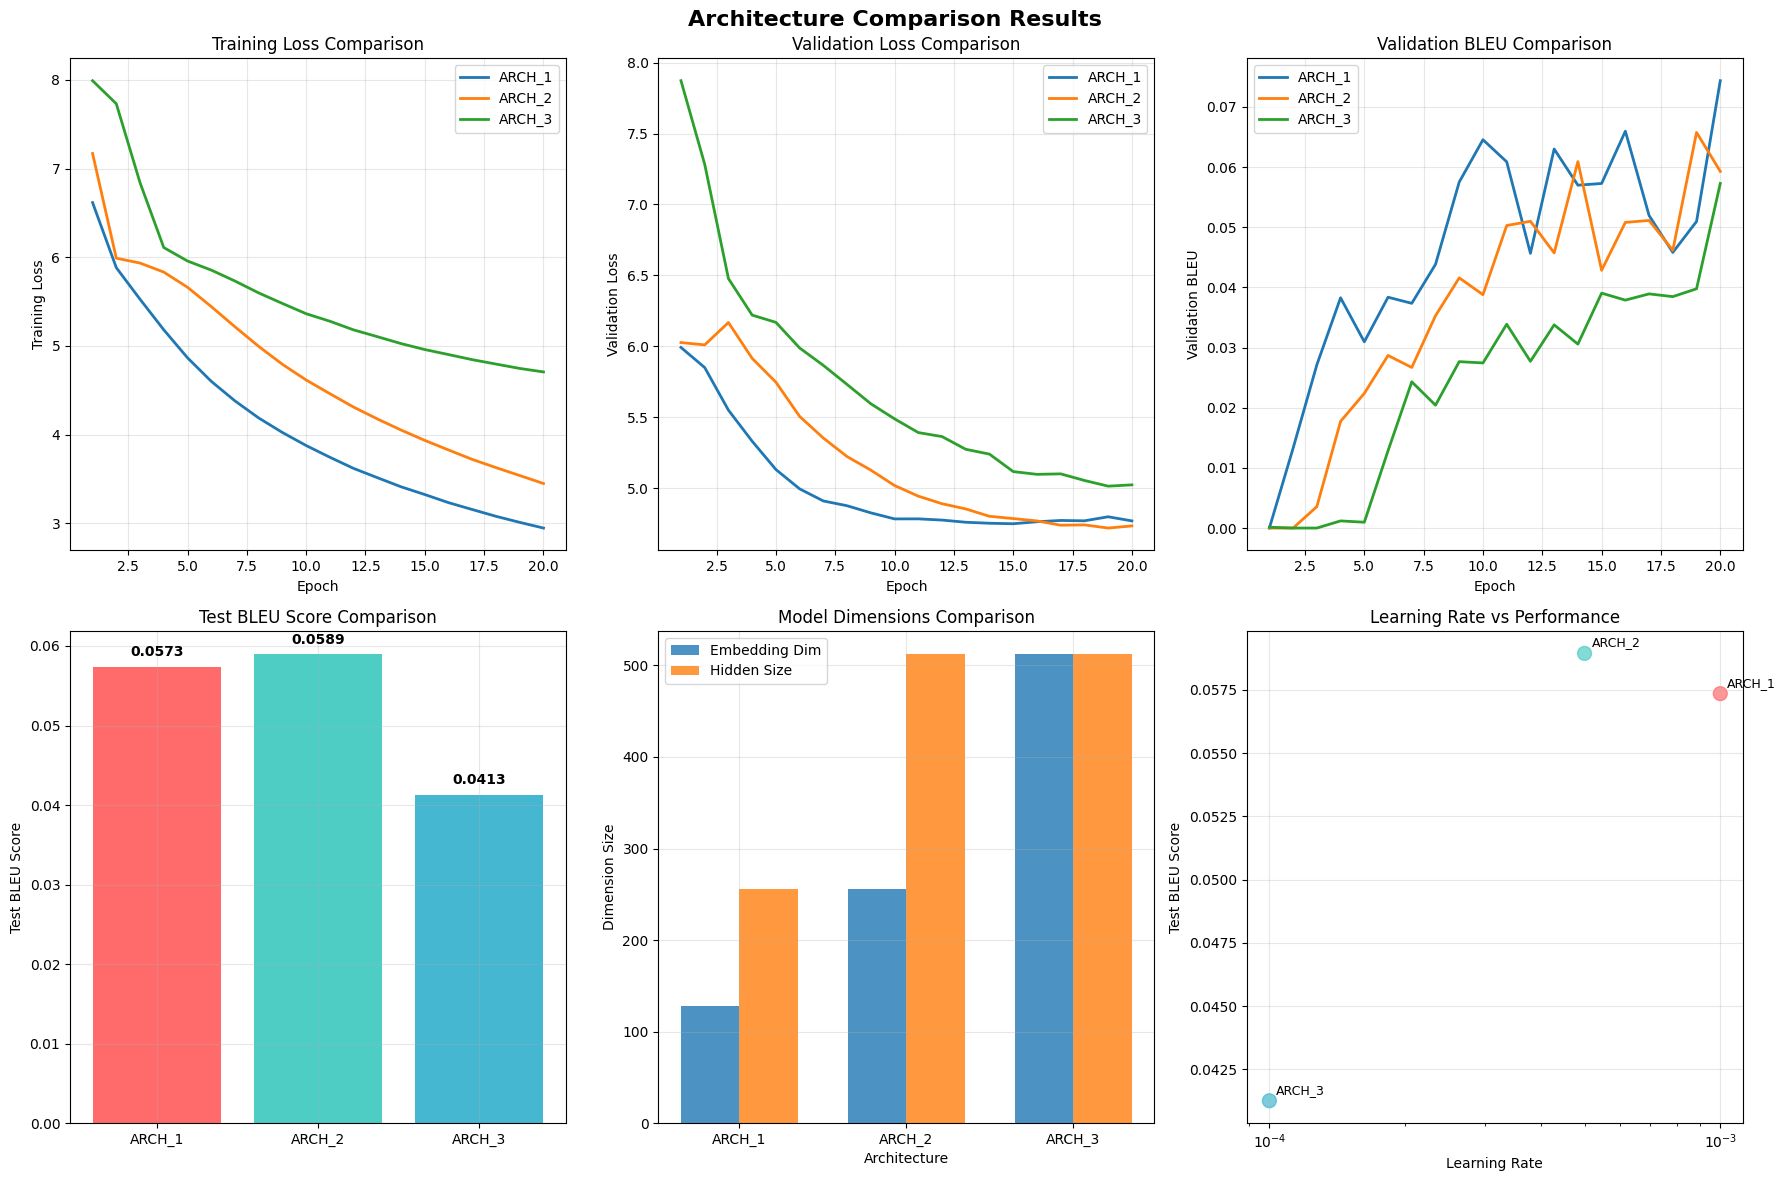


Visualization saved as 'three_architectures_comparison.png'

THREE ARCHITECTURE ANALYSIS COMPLETE!


In [18]:
# Chunk 4: COMPREHENSIVE EVALUATION AND COMPARISON OF ALL THREE ARCHITECTURES
import editdistance
import matplotlib.pyplot as plt
import numpy as np

def evaluate_architecture_on_test(arch_name, results, data_dict):
    """Evaluate a trained architecture on test set"""
    print(f"\n{'='*60}")
    print(f"EVALUATING {arch_name} ON TEST SET")
    print(f"{'='*60}")
    
    # Load best model
    model = ALL_MODELS[arch_name]
    model.load_state_dict(results['best_model_state'])
    model.eval()
    
    # Create test loader
    _, _, test_loader = create_data_loaders(data_dict, ARCHITECTURES[arch_name])
    
    def translate_sentence(model, sentence, src_sp, tgt_sp, device, max_len=100):
        model.eval()
        with torch.no_grad():
            src_tokens = src_sp.encode(sentence, out_type=int)
            if len(src_tokens) == 0:
                return ""
                
            src = torch.tensor([src_tokens], dtype=torch.long).to(device)
            src_lens = torch.tensor([len(src_tokens)], dtype=torch.long).to(device)
            
            encoder_outputs, (encoder_hidden, encoder_cell) = model.encoder(src, src_lens)
            decoder_hidden, decoder_cell = model.init_decoder_states(encoder_hidden, encoder_cell)
            
            translated_tokens = [data_dict['BOS_ID']]
            input_token = torch.tensor([[data_dict['BOS_ID']]], dtype=torch.long).to(device)
            
            for _ in range(max_len):
                output, (decoder_hidden, decoder_cell) = model.decoder(
                    input_token, decoder_hidden, decoder_cell
                )
                
                next_token = output.argmax(dim=-1).item()
                translated_tokens.append(next_token)
                
                if next_token == data_dict['EOS_ID']:
                    break
                    
                input_token = torch.tensor([[next_token]], dtype=torch.long).to(device)
            
            translated_tokens = [t for t in translated_tokens[1:] if t != data_dict['EOS_ID']]
            return tgt_sp.decode(translated_tokens)
    
    # Test examples
    test_examples = [
        "زندگی تجھ پہ اب الزام کوئی کیا رکھے",
        "عاشقی میں میرؔ جیسے خواب مت دیکھا کرو", 
        "اب کے ہم بچھڑے تو شاید کبھی خوابوں میں ملیں",
        "دل میں کیا ہے محبت کے سوا اور کیا ہے",
        "یہ دنیا اک تماشا ہے جہاں ہر شخص اداکار"
    ]

    print(f"\n{arch_name} SAMPLE TRANSLATIONS:")
    print("-" * 40)
    for i, urdu_text in enumerate(test_examples, 1):
        translation = translate_sentence(model, urdu_text, data_dict['urdu_sp'], data_dict['roman_sp'], DEVICE, max_len=120)
        print(f"{i}. Urdu: {urdu_text}")
        print(f"   Roman: {translation}")
        print()

    # Comprehensive test evaluation
    bleu_scores = []
    cer_scores = []
    smooth = SmoothingFunction().method1

    print(f"Evaluating on {len(data_dict['test_pairs'])} test examples...")
    
    for i, (src_text, ref_text) in enumerate(data_dict['test_pairs']):
        pred_text = translate_sentence(model, src_text, data_dict['urdu_sp'], data_dict['roman_sp'], DEVICE, max_len=120)
        
        if pred_text:
            bleu = sentence_bleu([ref_text.split()], pred_text.split(), smoothing_function=smooth)
            bleu_scores.append(bleu)
            
            cer = editdistance.eval(list(ref_text), list(pred_text)) / max(1, len(ref_text))
            cer_scores.append(cer)
        
        # Print first few examples
        if i < 5:
            print(f"Example {i+1}:")
            print(f"  SRC:  {src_text}")
            print(f"  REF:  {ref_text}")  
            print(f"  PRED: {pred_text}")
            if pred_text:
                print(f"  BLEU: {bleu:.4f}, CER: {cer:.4f}")
            print()
        
        if (i + 1) % 200 == 0:
            print(f"  Processed {i+1} examples...")

    # Calculate final metrics
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0.0
    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 1.0

    return {
        'test_bleu': avg_bleu,
        'test_cer': avg_cer,
        'num_examples': len(bleu_scores)
    }

# Evaluate all architectures on test set
print("EVALUATING ALL ARCHITECTURES ON TEST SET...")
TEST_RESULTS = {}

for arch_name in ARCHITECTURES.keys():
    results = TRAINING_RESULTS[arch_name]
    data_dict = ALL_DATA[arch_name]
    test_metrics = evaluate_architecture_on_test(arch_name, results, data_dict)
    TEST_RESULTS[arch_name] = test_metrics

# Create comprehensive comparison
print(f"\n{'='*100}")
print("FINAL COMPREHENSIVE COMPARISON OF ALL THREE ARCHITECTURES")
print(f"{'='*100}")

comparison_data = []
for arch_name in ARCHITECTURES.keys():
    config = ARCHITECTURES[arch_name]
    train_results = TRAINING_RESULTS[arch_name]
    test_results = TEST_RESULTS[arch_name]
    
    comparison_data.append({
        'Architecture': arch_name,
        'Embed_Dim': config['embed_dim'],
        'Hidden_Size': config['hidden_size'],
        'Encoder_Layers': config['encoder_layers'],
        'Decoder_Layers': config['decoder_layers'],
        'Batch_Size': config['batch_size'],
        'Learning_Rate': config['learning_rate'],
        'Dropout': config['dropout'],
        'Best_Val_Loss': train_results['best_val_loss'],
        'Final_Train_Loss': train_results['history']['train_loss'][-1],
        'Final_Val_BLEU': train_results['history']['val_bleu'][-1],
        'Test_BLEU': test_results['test_bleu'],
        'Test_CER': test_results['test_cer']
    })

# Print detailed comparison table
print("\nDETAILED ARCHITECTURE COMPARISON:")
print("-" * 120)
print(f"{'Arch':<8} {'Embed':<6} {'Hidden':<7} {'Enc':<4} {'Dec':<4} {'Batch':<6} {'LR':<8} {'Drop':<5} {'Val_Loss':<9} {'Test_BLEU':<10} {'Test_CER':<8}")
print("-" * 120)

for data in comparison_data:
    print(f"{data['Architecture']:<8} {data['Embed_Dim']:<6} {data['Hidden_Size']:<7} {data['Encoder_Layers']:<4} {data['Decoder_Layers']:<4} "
          f"{data['Batch_Size']:<6} {data['Learning_Rate']:<8.0e} {data['Dropout']:<5} {data['Best_Val_Loss']:<9.4f} "
          f"{data['Test_BLEU']:<10.4f} {data['Test_CER']:<8.4f}")

# Find best architecture based on test BLEU
best_arch_by_bleu = max(comparison_data, key=lambda x: x['Test_BLEU'])
best_arch_by_loss = min(comparison_data, key=lambda x: x['Best_Val_Loss'])

print(f"\n{'='*80}")
print("FINAL RESULTS:")
print(f"{'='*80}")
print(f"Best Architecture by Test BLEU: {best_arch_by_bleu['Architecture']} (BLEU: {best_arch_by_bleu['Test_BLEU']:.4f})")
print(f"Best Architecture by Val Loss:  {best_arch_by_loss['Architecture']} (Loss: {best_arch_by_loss['Best_Val_Loss']:.4f})")
print(f"{'='*80}")

# Create visualization plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Architecture Comparison Results', fontsize=16, fontweight='bold')

# 1. Training Loss Comparison
ax = axes[0, 0]
for arch_name in ARCHITECTURES.keys():
    history = TRAINING_RESULTS[arch_name]['history']
    epochs = range(1, len(history['train_loss']) + 1)
    ax.plot(epochs, history['train_loss'], label=f'{arch_name}', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Training Loss Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Validation Loss Comparison
ax = axes[0, 1]
for arch_name in ARCHITECTURES.keys():
    history = TRAINING_RESULTS[arch_name]['history']
    epochs = range(1, len(history['val_loss']) + 1)
    ax.plot(epochs, history['val_loss'], label=f'{arch_name}', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Validation Loss Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Validation BLEU Comparison
ax = axes[0, 2]
for arch_name in ARCHITECTURES.keys():
    history = TRAINING_RESULTS[arch_name]['history']
    epochs = range(1, len(history['val_bleu']) + 1)
    ax.plot(epochs, history['val_bleu'], label=f'{arch_name}', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation BLEU')
ax.set_title('Validation BLEU Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Test BLEU Bar Chart
ax = axes[1, 0]
arch_names = [data['Architecture'] for data in comparison_data]
test_bleus = [data['Test_BLEU'] for data in comparison_data]
bars = ax.bar(arch_names, test_bleus, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax.set_ylabel('Test BLEU Score')
ax.set_title('Test BLEU Score Comparison')
ax.grid(True, alpha=0.3)
# Add value labels on bars
for bar, value in zip(bars, test_bleus):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{value:.4f}', 
            ha='center', va='bottom', fontweight='bold')

# 5. Parameter Configuration Comparison
ax = axes[1, 1]
embed_dims = [data['Embed_Dim'] for data in comparison_data]
hidden_sizes = [data['Hidden_Size'] for data in comparison_data]
x = np.arange(len(arch_names))
width = 0.35

bars1 = ax.bar(x - width/2, embed_dims, width, label='Embedding Dim', alpha=0.8)
bars2 = ax.bar(x + width/2, hidden_sizes, width, label='Hidden Size', alpha=0.8)
ax.set_xlabel('Architecture')
ax.set_ylabel('Dimension Size')
ax.set_title('Model Dimensions Comparison')
ax.set_xticks(x)
ax.set_xticklabels(arch_names)
ax.legend()
ax.grid(True, alpha=0.3)

# 6. Hyperparameter vs Performance
ax = axes[1, 2]
learning_rates = [data['Learning_Rate'] for data in comparison_data]
test_bleus = [data['Test_BLEU'] for data in comparison_data]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

scatter = ax.scatter(learning_rates, test_bleus, c=colors, s=100, alpha=0.7)
for i, arch_name in enumerate(arch_names):
    ax.annotate(arch_name, (learning_rates[i], test_bleus[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Test BLEU Score')
ax.set_title('Learning Rate vs Performance')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('three_architectures_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved as 'three_architectures_comparison.png'")
print("\n" + "="*100)
print("THREE ARCHITECTURE ANALYSIS COMPLETE!")
print("="*100)

EVALUATING ALL ARCHITECTURES ON TEST SET...

EVALUATING ARCH_1 ON TEST SET

ARCH_1 SAMPLE TRANSLATIONS:
----------------------------------------
1. Urdu: زندگی تجھ پہ اب الزام کوئی کیا رکھے
   Roman: pe pe pe kya kya kya

2. Urdu: عاشقی میں میرؔ جیسے خواب مت دیکھا کرو
   Roman: i men men khvab khvabn tumhen tumhen

3. Urdu: اب کے ہم بچھڑے تو شاید کبھی خوابوں میں ملیں
   Roman: ab to ke toe to toonon men men

4. Urdu: دل میں کیا ہے محبت کے سوا اور کیا ہے
   Roman: men men hai hai kya ke ke kya kya hai

5. Urdu: یہ دنیا اک تماشا ہے جہاں ہر شخص اداکار
   Roman: ik ik ik har har har har baar-

Evaluating on 4879 test examples...
Example 1:
  SRC:  اوس پڑی تھی رات بہت اور کہرہ تھا گرمائش پر
  REF:  os padi thi raat bahut aur kohra tha garmaish par
  PRED: ki thi thi thi thi thi par para tha
  BLEU: 0.0282, CER: 0.6122

Example 2:
  SRC:  میں دیکھوں تو سہی دنیا تمہیں کیسے ستاتی ہے
  REF:  main dekhun to sahi duniya tumhen kaise satati hai
  PRED: phir to bahar saetiititi hai
  BLEU: 0.0287, 

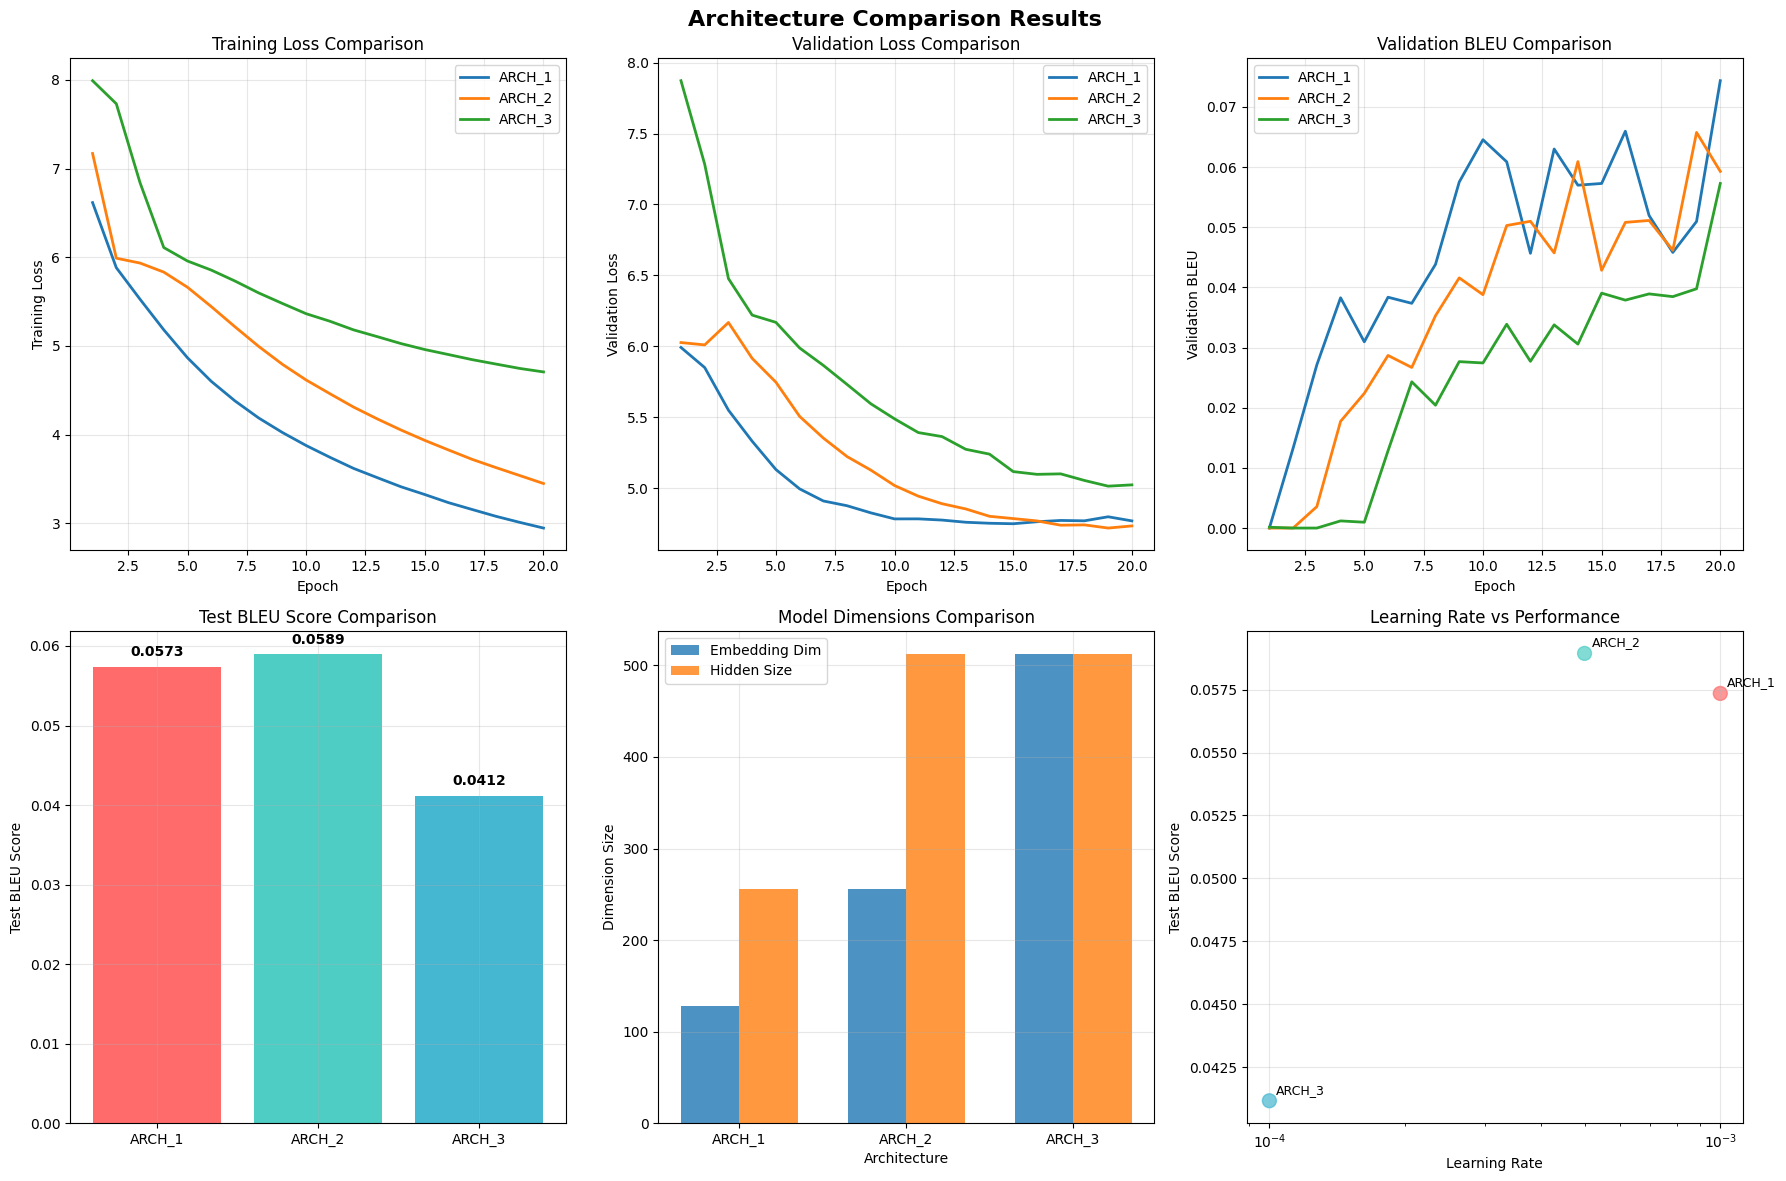


Visualization saved as 'three_architectures_comparison.png'

THREE ARCHITECTURE ANALYSIS COMPLETE!


In [20]:
# COMPREHENSIVE EVALUATION AND COMPARISON OF ALL THREE ARCHITECTURES
import editdistance
import matplotlib.pyplot as plt
import numpy as np

def evaluate_architecture_on_test(arch_name, results, data_dict):
    """Evaluate a trained architecture on test set"""
    print(f"\n{'='*60}")
    print(f"EVALUATING {arch_name} ON TEST SET")
    print(f"{'='*60}")
    
    # Load best model
    model = ALL_MODELS[arch_name]
    model.load_state_dict(results['best_model_state'])
    model.eval()
    
    # Create test loader
    _, _, test_loader = create_data_loaders(data_dict, ARCHITECTURES[arch_name])
    
    def translate_sentence(model, sentence, src_sp, tgt_sp, device, max_len=100):
        model.eval()
        with torch.no_grad():
            src_tokens = src_sp.encode(sentence, out_type=int)
            if len(src_tokens) == 0:
                return ""
                
            src = torch.tensor([src_tokens], dtype=torch.long).to(device)
            src_lens = torch.tensor([len(src_tokens)], dtype=torch.long).to(device)
            
            encoder_outputs, (encoder_hidden, encoder_cell) = model.encoder(src, src_lens)
            decoder_hidden, decoder_cell = model.init_decoder_states(encoder_hidden, encoder_cell)
            
            translated_tokens = [data_dict['BOS_ID']]
            input_token = torch.tensor([[data_dict['BOS_ID']]], dtype=torch.long).to(device)
            
            for _ in range(max_len):
                output, (decoder_hidden, decoder_cell) = model.decoder(
                    input_token, decoder_hidden, decoder_cell
                )
                
                next_token = output.argmax(dim=-1).item()
                translated_tokens.append(next_token)
                
                if next_token == data_dict['EOS_ID']:
                    break
                    
                input_token = torch.tensor([[next_token]], dtype=torch.long).to(device)
            
            translated_tokens = [t for t in translated_tokens[1:] if t != data_dict['EOS_ID']]
            return tgt_sp.decode(translated_tokens)
    
    # Test examples
    test_examples = [
        "زندگی تجھ پہ اب الزام کوئی کیا رکھے",
        "عاشقی میں میرؔ جیسے خواب مت دیکھا کرو", 
        "اب کے ہم بچھڑے تو شاید کبھی خوابوں میں ملیں",
        "دل میں کیا ہے محبت کے سوا اور کیا ہے",
        "یہ دنیا اک تماشا ہے جہاں ہر شخص اداکار"
    ]

    print(f"\n{arch_name} SAMPLE TRANSLATIONS:")
    print("-" * 40)
    for i, urdu_text in enumerate(test_examples, 1):
        translation = translate_sentence(model, urdu_text, data_dict['urdu_sp'], data_dict['roman_sp'], DEVICE, max_len=120)
        print(f"{i}. Urdu: {urdu_text}")
        print(f"   Roman: {translation}")
        print()

    # Comprehensive test evaluation
    bleu_scores = []
    cer_scores = []
    smooth = SmoothingFunction().method1

    print(f"Evaluating on {len(data_dict['test_pairs'])} test examples...")
    
    for i, (src_text, ref_text) in enumerate(data_dict['test_pairs']):
        pred_text = translate_sentence(model, src_text, data_dict['urdu_sp'], data_dict['roman_sp'], DEVICE, max_len=120)
        
        if pred_text:
            bleu = sentence_bleu([ref_text.split()], pred_text.split(), smoothing_function=smooth)
            bleu_scores.append(bleu)
            
            cer = editdistance.eval(list(ref_text), list(pred_text)) / max(1, len(ref_text))
            cer_scores.append(cer)
        
        # Print first few examples
        if i < 5:
            print(f"Example {i+1}:")
            print(f"  SRC:  {src_text}")
            print(f"  REF:  {ref_text}")  
            print(f"  PRED: {pred_text}")
            if pred_text:
                print(f"  BLEU: {bleu:.4f}, CER: {cer:.4f}")
            print()
        
        if (i + 1) % 200 == 0:
            print(f"  Processed {i+1} examples...")

    # Calculate final metrics
    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0.0
    avg_cer = sum(cer_scores) / len(cer_scores) if cer_scores else 1.0

    return {
        'test_bleu': avg_bleu,
        'test_cer': avg_cer,
        'num_examples': len(bleu_scores)
    }

# Evaluate all architectures on test set
print("EVALUATING ALL ARCHITECTURES ON TEST SET...")
TEST_RESULTS = {}

for arch_name in ARCHITECTURES.keys():
    results = TRAINING_RESULTS[arch_name]
    data_dict = ALL_DATA[arch_name]
    test_metrics = evaluate_architecture_on_test(arch_name, results, data_dict)
    TEST_RESULTS[arch_name] = test_metrics

# Create comprehensive comparison
print(f"\n{'='*100}")
print("FINAL COMPREHENSIVE COMPARISON OF ALL THREE ARCHITECTURES")
print(f"{'='*100}")

comparison_data = []
for arch_name in ARCHITECTURES.keys():
    config = ARCHITECTURES[arch_name]
    train_results = TRAINING_RESULTS[arch_name]
    test_results = TEST_RESULTS[arch_name]
    
    comparison_data.append({
        'Architecture': arch_name,
        'Embed_Dim': config['embed_dim'],
        'Hidden_Size': config['hidden_size'],
        'Encoder_Layers': config['encoder_layers'],
        'Decoder_Layers': config['decoder_layers'],
        'Batch_Size': config['batch_size'],
        'Learning_Rate': config['learning_rate'],
        'Dropout': config['dropout'],
        'Best_Val_Loss': train_results['best_val_loss'],
        'Final_Train_Loss': train_results['history']['train_loss'][-1],
        'Final_Val_BLEU': train_results['history']['val_bleu'][-1],
        'Test_BLEU': test_results['test_bleu'],
        'Test_CER': test_results['test_cer']
    })

# Print detailed comparison table
print("\nDETAILED ARCHITECTURE COMPARISON:")
print("-" * 120)
print(f"{'Arch':<8} {'Embed':<6} {'Hidden':<7} {'Enc':<4} {'Dec':<4} {'Batch':<6} {'LR':<8} {'Drop':<5} {'Val_Loss':<9} {'Test_BLEU':<10} {'Test_CER':<8}")
print("-" * 120)

for data in comparison_data:
    print(f"{data['Architecture']:<8} {data['Embed_Dim']:<6} {data['Hidden_Size']:<7} {data['Encoder_Layers']:<4} {data['Decoder_Layers']:<4} "
          f"{data['Batch_Size']:<6} {data['Learning_Rate']:<8.0e} {data['Dropout']:<5} {data['Best_Val_Loss']:<9.4f} "
          f"{data['Test_BLEU']:<10.4f} {data['Test_CER']:<8.4f}")

# Find best architecture based on test BLEU
best_arch_by_bleu = max(comparison_data, key=lambda x: x['Test_BLEU'])
best_arch_by_loss = min(comparison_data, key=lambda x: x['Best_Val_Loss'])

print(f"\n{'='*80}")
print("FINAL RESULTS:")
print(f"{'='*80}")
print(f"Best Architecture by Test BLEU: {best_arch_by_bleu['Architecture']} (BLEU: {best_arch_by_bleu['Test_BLEU']:.4f})")
print(f"Best Architecture by Val Loss:  {best_arch_by_loss['Architecture']} (Loss: {best_arch_by_loss['Best_Val_Loss']:.4f})")
print(f"{'='*80}")

# Create visualization plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Architecture Comparison Results', fontsize=16, fontweight='bold')

# 1. Training Loss Comparison
ax = axes[0, 0]
for arch_name in ARCHITECTURES.keys():
    history = TRAINING_RESULTS[arch_name]['history']
    epochs = range(1, len(history['train_loss']) + 1)
    ax.plot(epochs, history['train_loss'], label=f'{arch_name}', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
ax.set_title('Training Loss Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Validation Loss Comparison
ax = axes[0, 1]
for arch_name in ARCHITECTURES.keys():
    history = TRAINING_RESULTS[arch_name]['history']
    epochs = range(1, len(history['val_loss']) + 1)
    ax.plot(epochs, history['val_loss'], label=f'{arch_name}', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')
ax.set_title('Validation Loss Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Validation BLEU Comparison
ax = axes[0, 2]
for arch_name in ARCHITECTURES.keys():
    history = TRAINING_RESULTS[arch_name]['history']
    epochs = range(1, len(history['val_bleu']) + 1)
    ax.plot(epochs, history['val_bleu'], label=f'{arch_name}', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation BLEU')
ax.set_title('Validation BLEU Comparison')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Test BLEU Bar Chart
ax = axes[1, 0]
arch_names = [data['Architecture'] for data in comparison_data]
test_bleus = [data['Test_BLEU'] for data in comparison_data]
bars = ax.bar(arch_names, test_bleus, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax.set_ylabel('Test BLEU Score')
ax.set_title('Test BLEU Score Comparison')
ax.grid(True, alpha=0.3)
# Add value labels on bars
for bar, value in zip(bars, test_bleus):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{value:.4f}', 
            ha='center', va='bottom', fontweight='bold')

# 5. Parameter Configuration Comparison
ax = axes[1, 1]
embed_dims = [data['Embed_Dim'] for data in comparison_data]
hidden_sizes = [data['Hidden_Size'] for data in comparison_data]
x = np.arange(len(arch_names))
width = 0.35

bars1 = ax.bar(x - width/2, embed_dims, width, label='Embedding Dim', alpha=0.8)
bars2 = ax.bar(x + width/2, hidden_sizes, width, label='Hidden Size', alpha=0.8)
ax.set_xlabel('Architecture')
ax.set_ylabel('Dimension Size')
ax.set_title('Model Dimensions Comparison')
ax.set_xticks(x)
ax.set_xticklabels(arch_names)
ax.legend()
ax.grid(True, alpha=0.3)

# 6. Hyperparameter vs Performance
ax = axes[1, 2]
learning_rates = [data['Learning_Rate'] for data in comparison_data]
test_bleus = [data['Test_BLEU'] for data in comparison_data]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

scatter = ax.scatter(learning_rates, test_bleus, c=colors, s=100, alpha=0.7)
for i, arch_name in enumerate(arch_names):
    ax.annotate(arch_name, (learning_rates[i], test_bleus[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Test BLEU Score')
ax.set_title('Learning Rate vs Performance')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('three_architectures_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nVisualization saved as 'three_architectures_comparison.png'")
print("\n" + "="*100)
print("THREE ARCHITECTURE ANALYSIS COMPLETE!")
print("="*100)

# Finding better architecture

From our testing best we were able to achieve was BLEU score of approx 9
with following architecture:

CONFIG_IMPROVED = {
     "roman_txt": "/kaggle/input/urduromanurdu-cleaned/all_english_clean.txt",
    "urdu_txt" : "/kaggle/input/urduromanurdu-cleaned/all_urdu.txt",
    "roman_spm": "roman_tokenizer.model",
    "urdu_spm" : "urdu_tokenizer.model",
    
    #  MODEL ARCHITECTURE
    "embed_dim": 384,           # Embedding size
    "hidden_size": 512,         
    "encoder_layers": 2,        
    "decoder_layers": 2,        # Balanced with encoder
    "feedforward_dim": 512,    
    
    # ADVANCED DROPOUT STRATEGY
    "input_dropout": 0.1,       # Input dropout
    "encoder_dropout": 0.15,    # Lower encoder dropout
    "decoder_dropout": 0.2,     # Moderate decoder dropout
    "output_dropout": 0.1,      # Higher output dropout
    "residual_dropout": 0.1,    # Residual connection dropout
    
    # CURRICULUM LEARNING & TRAINING DYNAMICS
    "batch_size": 32,            
    "gradient_accumulation": 4,  
    "learning_rate": 0.01,      
    "warmup_steps": 2000,       # Longer warmup
    "max_grad_norm": 0.5,       # Stricter gradient clipping
    "num_epochs": 50,          
    "patience": 8,             

     # Better teacher forcing schedule
    "teacher_start": 0.9,      
    "teacher_end": 0.3,        
    "teacher_decay": 0.95,     
    
    # SOPHISTICATED TEACHER FORCING
    "teacher_start": 1.0,      
    "teacher_end": 0.1,        
    "teacher_decay_type": "cosine",  # Cosine decay schedule
    "teacher_warmup_epochs": 5, # Teacher forcing warmup
    
    # ENHANCED DATA PREPROCESSING
    "max_len": 100,              # Reduced max length for focus
    "min_len": 5,               # Increased min length for quality
    "vocab_size_src": 2500,    # Larger Urdu vocab
    "vocab_size_tgt": 2500,     # Larger Roman vocab
    "length_penalty": 1.2,      # Length normalization


     "num_workers": 2,
    # REGULARIZATION & OPTIMIZATION
    "label_smoothing": 0.15,    
    "weight_decay": 1e-3,       # Weight decay
    "lr_scheduler": "cosine",   # Cosine annealing

    "min_lr": 1e-7,    
     "seed": 42,
}
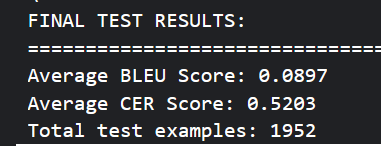
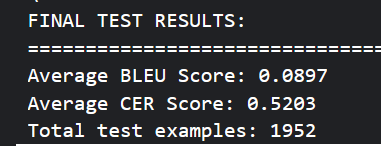

# Conclusion and Remarks:
from above experiements we can see there there is high Validation loss and Low BLEU and reson may include:
1. Smaller data set. Our data set contains only 12k lines.Model starts to overfit as we try to increase model complexity additionally it was observed that if we change split from 50 training 25 validation and testing data to 80% 10% 10% our results are improved.
2. We have use L2 regularization in adam to cater overfitting issue.
3. Bi LSTM and LSTM architecture is weaker for such cases. Attention and Self attention is needed for such cases